## Importation and function definition

In [6]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

def wigner_plot(rho,split):
    theta_list=np.linspace(0,np.pi,split);
    phi_list=np.linspace(0,2*np.pi,split);
    wigner_function=qt.spin_wigner(rho,theta_list,phi_list);
    P_matrix=wigner_function[0];theta_matrix=wigner_function[1];phi_matrix=wigner_function[2];
    qt.plot_spin_distribution_3d(P_matrix,theta_matrix,phi_matrix,figsize=(8,6));
    return 0

sigmax=qt.spin_Jx(5/2);
sigmay=qt.spin_Jy(5/2);
sigmaz=qt.spin_Jz(5/2);

## Main

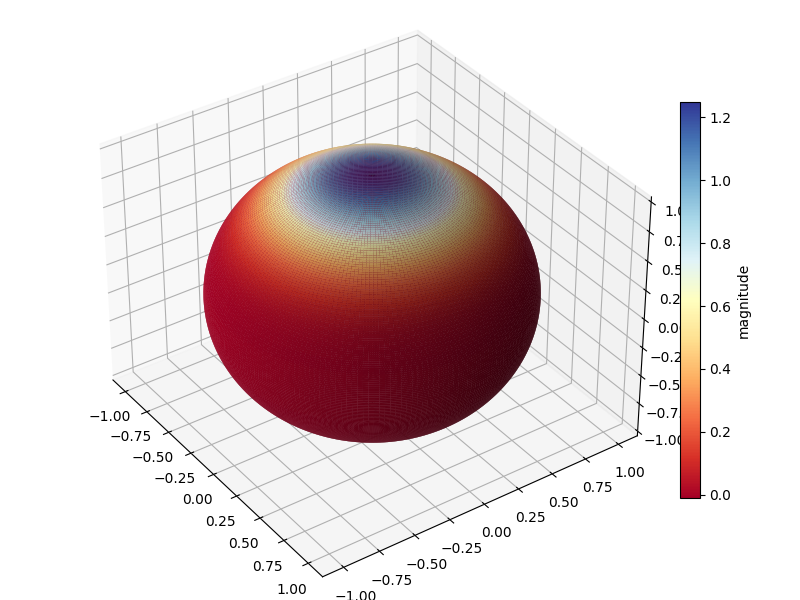

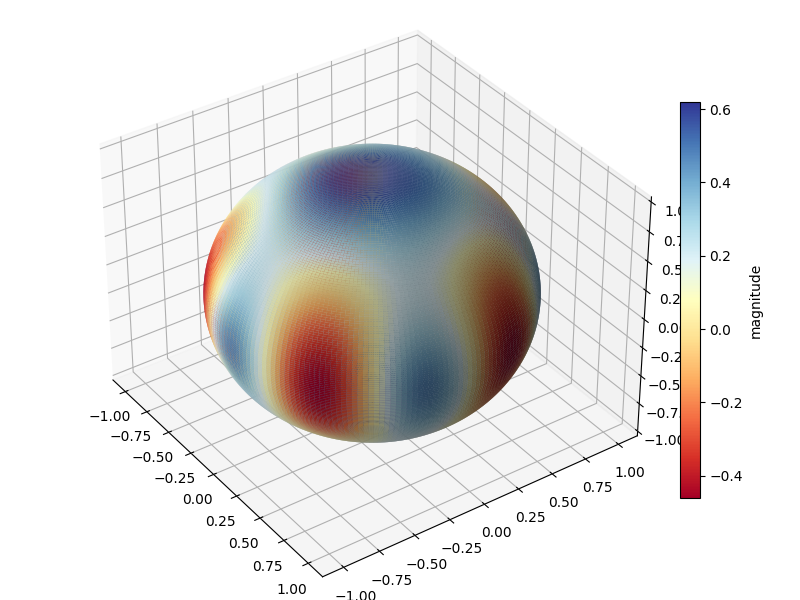

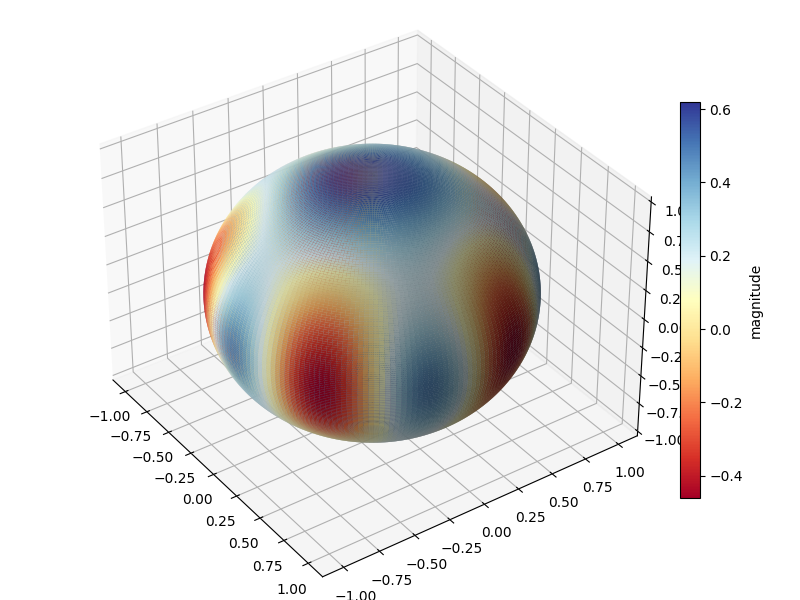

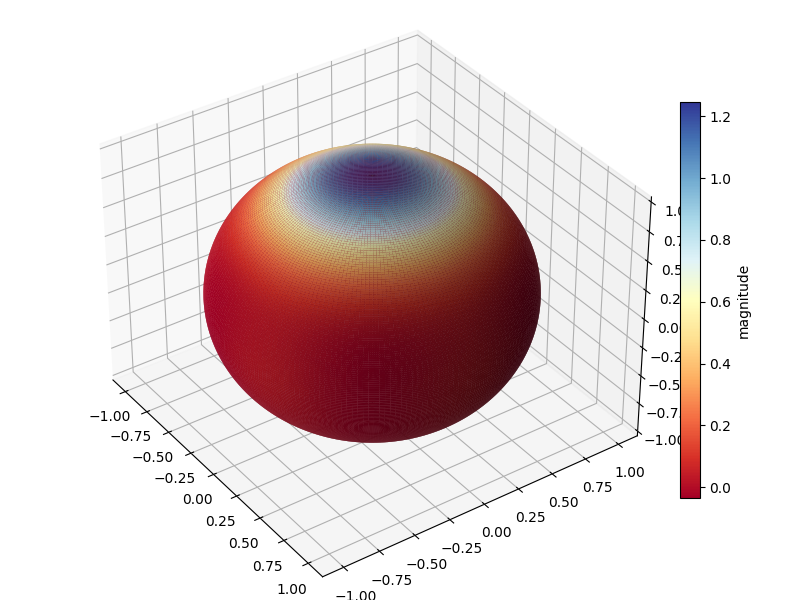

In [7]:
initial_state=np.array([1,0,0,0,0,0]);
initial_state=qt.Qobj(initial_state);
initial_rho=initial_state*qt.dag(initial_state);

split=200;

cat_state=qt.mesolve(sigmax+sigmax**2,initial_rho,[0,np.pi/2]);
cat_rho=cat_state.states[1]

precess_state=qt.mesolve(sigmaz,cat_rho,[0,np.pi/2*0.01]);
precess_rho=precess_state.states[1];

detection_state=qt.mesolve(sigmax+sigmax**2,precess_rho,[0,3*np.pi/2]);
detection_rho=detection_state.states[1]

%matplotlib ipympl


wigner_plot(initial_rho,split);


wigner_plot(cat_rho,split);


wigner_plot(precess_rho,split);


wigner_plot(detection_rho,split);
